In [3]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import files
uploaded = files.upload()

Saving finalDFdummy_13March.csv to finalDFdummy_13March.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['finalDFdummy_13March.csv']))
df = df.drop(columns = "Unnamed: 0")
df

,X1,PIN,Sex,Grade,HSG,IndGrd2,SAT,IndGrd,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,Region_South Asia,Region_Southeast Asia,Year_ay1415,Year_ay1516,Year_ay1617,Year_ay1718,Year_ay1819,Major_ANTHROPOLOGY,Major_ARTS AND HUMANITIES,Major_DDP LAW,Major_DDP LAW & GLOBAL AFFAIRS Major,"Major_DDP LAW & PHILOSOPHY, POLITICS AND ECONOMICS Major",Major_DDP LAW & PSYCHOLOGY Major,Major_DDP Law,Major_ECONOMICS,Major_ENVIRONMENTAL STUDIES,Major_GLOBAL AFFAIRS,Major_HISTORY,Major_LIFE SCIENCES,Major_LITERATURE,"Major_MATHEMATICAL, COMPUTATIONAL AND STATISTICAL SCIENCES",Major_PHILOSOPHY,"Major_PHILOSOPHY, POLITICS AND ECONOMICS",Major_PHYSICAL SCIENCES,Major_PSYCHOLOGY,Major_URBAN STUDIES,Major_Undecided,Major_Undeclared,AC1_Anthropology,AC1_Arts & Humanities,AC1_Economics,AC1_Environmental Studies,AC1_Global Affairs,AC1_History,AC1_Life Sciences,AC1_Literature,"AC1_Mathematical, Computational and Statistical Sciences",AC1_Philosophy,"AC1_Philosophy, Politics and Economics",AC1_Physical Sciences,AC1_Psychology,AC1_Undecided,AC1_Undeclared,AC1_Urban Studies,AC2_Anthropology,AC2_Arts & Humanities,AC2_Economics,AC2_Environmental Studies,AC2_Global Affairs,AC2_History,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,0,N313106412255,1,83.660000,3,91.575000,770,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,N303108421205,1,82.399000,4,78.237500,680,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,N397110424273,0,79.126000,4,80.762500,730,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,N308110412274,0,83.576000,3,79.225000,790,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,N337110408274,0,88.145000,3,89.750000,800,1.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1007,N322119401219,0,80.085017,4,82.116166,760,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
992,1008,N324119425219,0,79.600612,3,75.794952,640,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
993,1009,N325119424219,0,75.356574,3,67.149663,790,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
994,1010,N399119414221,0,79.846711,3,77.596502,710,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
X1 = df.drop(['IndGrd','PIN','Grade'], axis=1)
X = X1.values
y = df['IndGrd'].values #IndGrd is our predictor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [37]:
# Instanciate NN, build up layer structure and compile model
nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(70, input_shape=(Input_Shape,), activation='sigmoid')) 
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(35, activation='relu')) 
nn.add(Dropout(0.2)) 
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# Set callback to store model with best validation accuracy during training.
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# Train model and store best performing version
fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 70)                4970      
_________________________________________________________________
dropout_24 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 35)                2485      
_________________________________________________________________
dropout_25 (Dropout)         (None, 35)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 36        
Total params: 7,491
Trainable params: 7,491
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Plot model evaluation of best and final model after completed training.
accuracy = best_nn.evaluate(X_train, y_train, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))
accuracy = best_nn.evaluate(X_test, y_test, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
accuracy = nn.evaluate(X_train, y_train, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))
accuracy = nn.evaluate(X_test, y_test, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.2173
Best Model Training Accuracy: 0.9008
Best Model Testing Score: 0.2120
Best Model Testing Accuracy: 0.9150
Final Model Training Score: 0.1998
Final Model Training Accuracy: 0.9045
Final Model Testing Score: 0.1971
Final Model Testing Accuracy: 0.9150


In [16]:
#Define funtion to show history of loss and accuracy during entire model training.
def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc.')
    plt.plot(x, val_acc, 'r', label='Testing Acc.')
    plt.title('Training & Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training & Testing Accuracy')
    plt.legend()

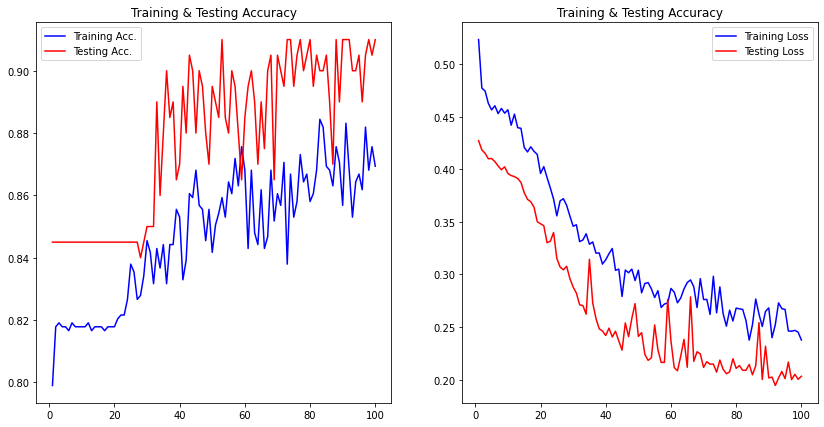

In [27]:
plot_history(fit_nn)

In [18]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_nn = best_nn.predict(X_test)
y_pred_nn_prob = best_nn.predict_proba(X_test)
y_pred_nn_classes = best_nn.predict_classes(X_test)

# Reduce to 1d array.
y_pred_nn_prob_1 = y_pred_nn_prob[:,0]
y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
# Print NN evaluation metrics.

nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("-----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes_1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("-----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classes_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

Confusion Matrix:
[[164   5]
 [ 12  19]]
-----------------------------------------
Accuracy: 0.915000
ROC AUC: 0.923650
-----------------------------------------
Precision: 0.791667
Recall: 0.612903
F1 score: 0.690909


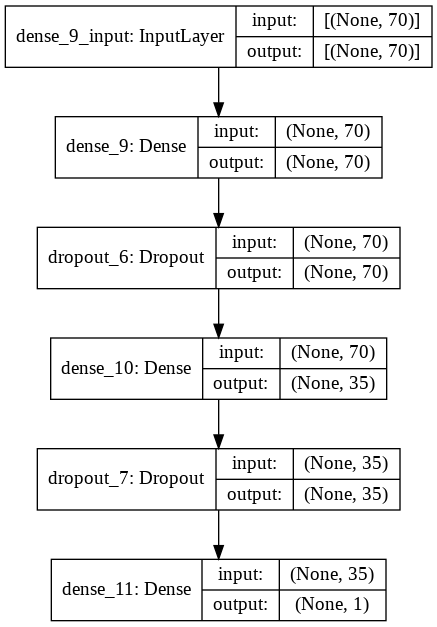

In [20]:
from keras.utils import plot_model
plot_model(nn, to_file='/tmp/model.png', show_shapes=True,)

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip3 install ann_visualizer
import ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=55afd2eeb1ba867e3caf1fdcee64063308759b4467ea91226de05553ae51fce9
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
!sudo apt-get install graphviz && pip3 install graphviz
import graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(nn)